# **Linear Regresion**

```scikit-learn``` webpage [here](https://scikit-learn.org/stable/index.html) \
```linear_regression``` module documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)

In [1]:
import numpy as np # Librería mateamtica
import matplotlib.pyplot as plt # plots
from sklearn.linear_model import LinearRegression # scikit-learn: libreria de IA para python

(80,)
(80,)


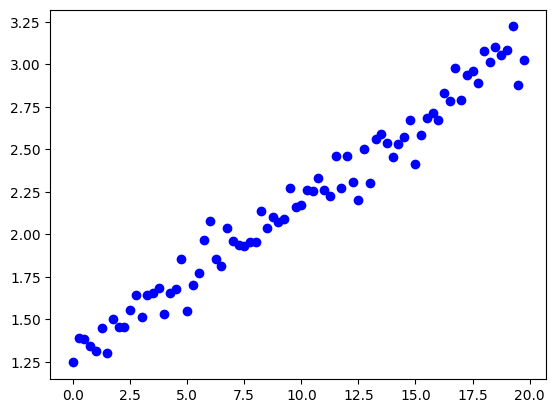

In [2]:
def f(x) : # Recrear el comportamiento de una funcion lineal
  y = (0.0918 * x) + 1.2859 + 0.1*np.random.randn (x.shape[0]) # Comportamiento lineal (w*x + b + ruido)
  return y

# Crear datos de entrenamiento.
x = np.arange (0, 20, 0.25); print (x.shape)
# Generar etiquetas para cada x
y = f(x) ; print (y.shape)

# Diagrama de dispersion
plt.scatter(x, y, color = 'blue')

In [3]:
# Instancia de la regresion lineal
linear_regression = LinearRegression()

# Entrenar el modelo de regresion lineal
linear_regression.fit( x.reshape([-1, 1]) , y ) # (#muestras, #caracteristicas)


# Imprimir los valores estimados para compararlos respecto a los originales
print ("w = " + str(linear_regression.coef_) + ", b = " + str(linear_regression.intercept_))

w = [0.09129659], b = 1.290050011062678


In [4]:
# Nueva muestra. Imprime el valor correspondiente de y
new_sample = np.array([5])
print (f(new_sample))

# Predecir la nueva muestra. Imprimir la prediccion
prediction = linear_regression.predict( new_sample.reshape([-1,1]))
print (prediction)

[1.81617616]
[1.74653297]


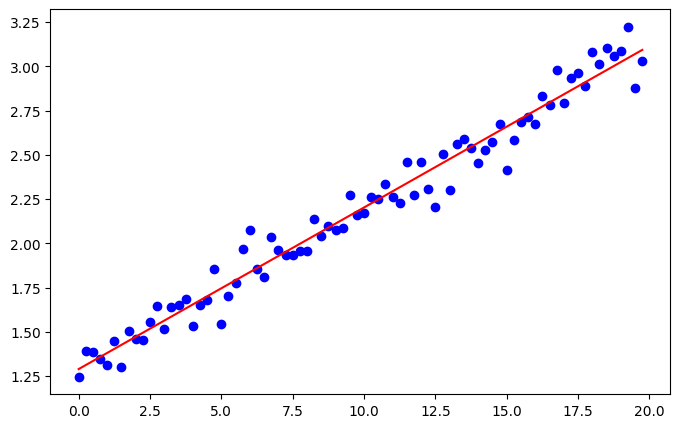

In [7]:
# Predecir todos los valores de x
predictions = linear_regression.predict(x.reshape(-1, 1))

# Dibuja los valores del las muestras (azul) y de prediccion (rojo)
_, ax = plt.subplots (figsize=(8,5))

ax.scatter(x, y, color = 'blue')
ax.plot (x, predictions, color = 'red')

## In real data

```datasets``` module info [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

In [8]:
import numpy as np
import matplotlib.pyplot as plt # plots
from sklearn.linear_model import LinearRegression # scikit-learn: libreria de IA para python
from sklearn.datasets import load_diabetes

In [12]:
# Cargar la base de datos Diabetes
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)
print(diabetes_X.shape, diabetes_y.shape)


(442, 10) (442,)


(442, 1) (442,)


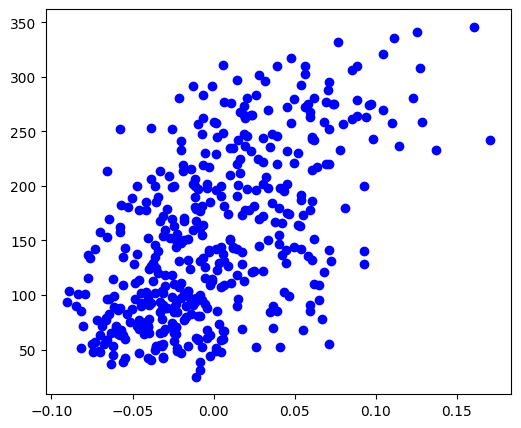

In [13]:
# Use only one feature
diabetes_X = diabetes_X[:, 2]
diabetes_X = diabetes_X[:, np.newaxis]
print(diabetes_X.shape, diabetes_y.shape)

_, ax = plt.subplots(figsize=(6,5))
ax.scatter(diabetes_X, diabetes_y, color='blue')

In [15]:
# Linear regression
linear_regression = LinearRegression()

# Train the model
linear_regression.fit( diabetes_X , diabetes_y )

print("w = {0}, b = {1}".format(linear_regression.coef_, linear_regression.intercept_))

w = [949.43526038], b = 152.13348416289617


In [16]:
# Make predictions using the testing set
diabetes_y_pred = linear_regression.predict( diabetes_X )


#print ("w = " + str( _ ) + ", b = " + str( _ ))

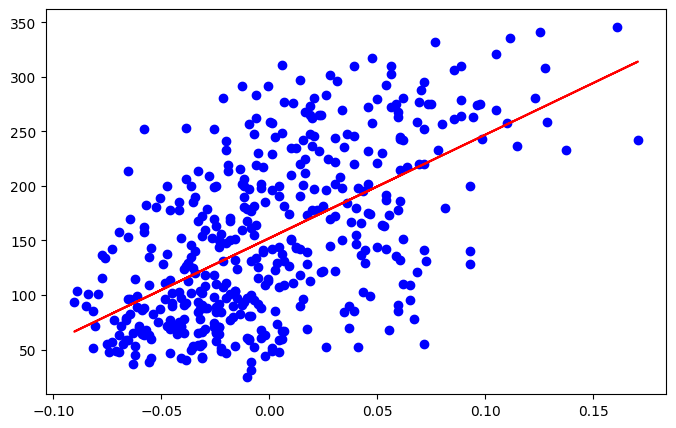

In [17]:
# Plot outputs
_, ax = plt.subplots (figsize=(8,5))
ax.scatter( diabetes_X , diabetes_y , color="blue")
ax.plot( diabetes_X , diabetes_y_pred , color="red")

# **Logistic Regresion**

Iris dataset description [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) \\
```logistic_regression``` module [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression # Regresion logistica
from sklearn.datasets import load_iris # Iris dataset
from sklearn.datasets import make_classification

(300, 2) (300,)
[0 1 2]


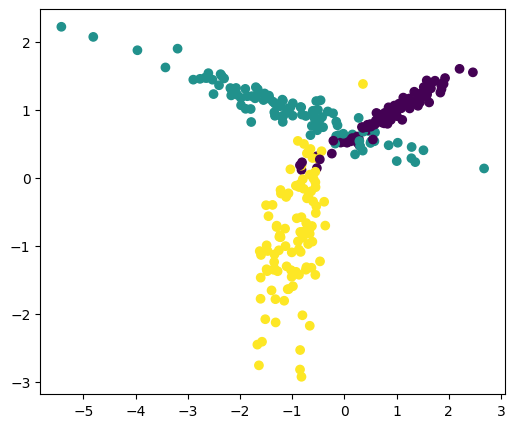

In [28]:
X, y = make_classification(n_samples = 300, n_features = 2, random_state= 1,n_informative = 2,
                           n_redundant = 0, n_clusters_per_class=1,n_classes=3)
print(X.shape, y.shape)
print(np.unique(y))
_, ax = plt.subplots(figsize=(6,5))
ax.scatter(X[:, 0], X[:,1], c = y)

In [30]:
logistic_regression = LogisticRegression()

logistic_regression.fit(X, y)

LogisticRegression()

In [38]:
h_min,h_max = X[:,0].min(),X[:,0].max()
v_min,v_max = X[:,1].min(),X[:,1].max()

h_grid, v_grid = np.meshgrid(np.linspace(h_min, h_max, 100), np.linspace(v_min, v_max, 100))
print(h_grid.shape, v_grid.shape)

pred_grid = logistic_regression.predict(np.c_[h_grid.ravel(), v_grid.ravel()])
pred_grid = pred_grid.reshape(h_grid.shape)
print(pred_grid.shape)

predictions = logistic_regression.predict(X)

(100, 100) (100, 100)
(100, 100)


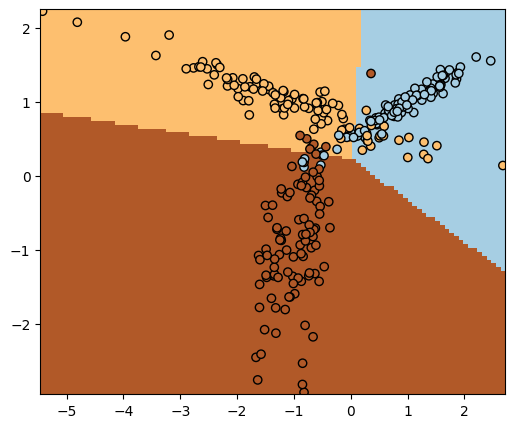

In [45]:
_, ax = plt.subplots(figsize=(6,5))
ax.pcolormesh(h_grid, v_grid, pred_grid, cmap = 'Paired')
ax.scatter(X[:,0], X[:,1], c= y, edgecolors = 'k', cmap = 'Paired')

In [ ]:
iris = load_iris() # Cargar la base de datos iris
iris_x = iris.data[:, :2] # Caracteristicas. Seleccionamos 2
iris_y = iris.target # Etiquetas

# Imprimir formas
print (iris_x.shape, iris_y.shape)

In [ ]:
# Instancia de la regresion logistica
logistic_regression = LogisticRegression()

# Entrenar el modelo de regresion logistica
logistic_regression.fit ( _ , _ ) #(#muestras, #caracteristicas)

### **Decision boundaries**

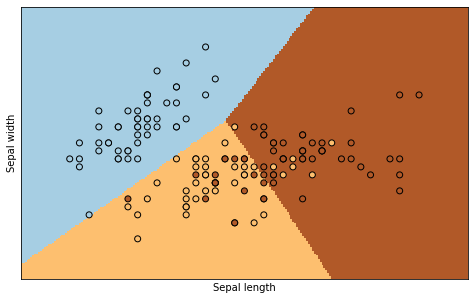

In [ ]:
# Valores minimos y maximos para crear el grid de las fronteras de decision
x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()

# Crear el grid de las fronteras de decision
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predecir los valores del grid
predictions = logistic_regression.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
print (predictions.shape)

In [ ]:
# Encajar las predicciones al tamaño del grid
predictions = predictions.reshape(x_grid.shape)

# Dibujar el grid y las fronteras de decision
_, ax = plt.subplots (figsize=(8,5))
ax.pcolormesh(x_grid, y_grid, predictions, cmap = plt.cm.Paired)

# Imprimir las muestras con el scatter
ax.scatter ( _ , _ ,  c = _ , edgecolors='k', cmap=plt.cm.Paired)

ax.set_xlim(x_grid.min(), x_grid.max())
ax.set_ylim(y_grid.min(), y_grid.max())

ax.set_xticks(())
ax.set_yticks(())